In [1]:
import numpy as np
import pandas as pd
import os
import joblib
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler

In [2]:
!pip install matplotlib

In [3]:
df = pd.read_csv("datasets/weight-height.csv")
df

,Gender,Weight,Height
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801
...,...,...,...
9995,Female,66.172652,136.777454
9996,Female,67.067155,170.867906
9997,Female,63.867992,128.475319
9998,Female,69.034243,163.852461


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Gender  10000 non-null  object 
 1   Weight  10000 non-null  float64
 2   Height  10000 non-null  float64
dtypes: float64(2), object(1)
memory usage: 234.5+ KB


In [5]:
print(df["Gender"].unique())

['Male' 'Female']


In [6]:
from sklearn.preprocessing import LabelEncoder

df['Gender'] = LabelEncoder().fit_transform(df["Gender"])

In [7]:
df.head

<bound method NDFrame.head of       Gender     Weight      Height
0          1  73.847017  241.893563
1          1  68.781904  162.310473
2          1  74.110105  212.740856
3          1  71.730978  220.042470
4          1  69.881796  206.349801
...      ...        ...         ...
9995       0  66.172652  136.777454
9996       0  67.067155  170.867906
9997       0  63.867992  128.475319
9998       0  69.034243  163.852461
9999       0  61.944246  113.649103

[10000 rows x 3 columns]>

In [8]:
reg = linear_model.LinearRegression()
reg.fit(df[['Gender','Height']],df.Weight)

LinearRegression()

In [9]:
reg.predict([[1, 71]])

C:\Users\LENOVO\anaconda3\envs\flask\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([54.78372213])

In [10]:
reg.coef_

array([-0.96286425,  0.12275942])

In [11]:
reg.intercept_

47.03066776872663

In [12]:
x = df.drop(['Weight'],axis=1).values
y = df['Weight'].values

In [13]:
x

array([[  1.        , 241.89356318],
       [  1.        , 162.31047252],
       [  1.        , 212.74085556],
       ...,
       [  0.        , 128.47531878],
       [  0.        , 163.85246135],
       [  0.        , 113.64910268]])

In [14]:
y

array([73.84701702, 68.78190405, 74.11010539, ..., 63.86799221,
       69.03424313, 61.94424588])

In [15]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33,random_state=1)

In [16]:
x_train

array([[  1.        , 176.03006723],
       [  1.        , 201.6018122 ],
       [  1.        , 183.73994786],
       ...,
       [  1.        , 175.09325469],
       [  0.        , 156.83219102],
       [  1.        , 198.4602486 ]])

In [17]:
x_test

array([[  0.        , 132.5342288 ],
       [  1.        , 190.8249379 ],
       [  1.        , 194.83139553],
       ...,
       [  1.        , 212.1572757 ],
       [  1.        , 179.57146645],
       [  1.        , 174.20976412]])

In [18]:
y_test

array([61.27834937, 70.45499146, 70.14476291, ..., 72.13199022,
       68.53897839, 66.27613841])

In [19]:
y_train

array([68.65021796, 70.35852191, 67.6727949 , ..., 66.53981222,
       66.56377205, 70.55524376])

In [20]:
model = LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [21]:
y_pred=model.predict(x_test)
print(y_pred)

[63.32090639 69.48092013 69.96920369 ... 72.08078036 68.10941302
 67.45596018]


In [22]:
accuracy = model.score(x_test, y_test)
print(accuracy)

0.869163381362392


In [23]:
print(f"Akurasi Model: {accuracy * 100}%")

Akurasi Model: 86.9163381362392%


Text(0.5, 1.0, 'prediksi berat badan berdasarkan gender dan tinggi badan')

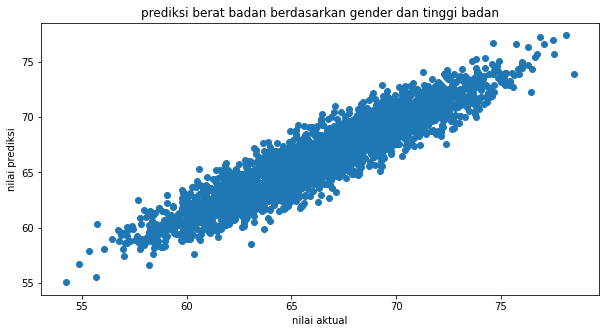

In [24]:
plt.figure(figsize=(10,5))
plt.scatter(y_test, y_pred)
plt.xlabel('nilai aktual')
plt.ylabel('nilai prediksi')
plt.title('prediksi berat badan berdasarkan gender dan tinggi badan')

In [25]:
pred_y_df=pd.DataFrame({'nilai aktual':y_test,'nilai prediksi':y_pred,'selisih':y_pred-y_test})
pred_y_df

,nilai aktual,nilai prediksi,selisih
0,61.278349,63.320906,2.042557
1,70.454991,69.480920,-0.974071
2,70.144763,69.969204,-0.175559
3,69.231469,67.409629,-1.821840
4,68.759636,65.899216,-2.860420
...,...,...,...
3295,67.350008,69.329665,1.979657
3296,73.749537,70.307341,-3.442196
3297,72.131990,72.080780,-0.051210
3298,68.538978,68.109413,-0.429565


In [26]:
std_scaler = StandardScaler()
label_enc = LabelEncoder()

df.iloc[:, :-1] = std_scaler.fit_transform(df.iloc[:, :-1])
df.weight = label_enc.fit_transform(df.Weight)

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_6892\1751925884.py:5: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  df.weight = label_enc.fit_transform(df.Weight)


In [27]:
joblib.dump((model, std_scaler), "weight-prediction-using-linear-regression.pkl")

['weight-prediction-using-linear-regression.pkl']